In [17]:
import numpy as np
import pandas as pd

import yfinance as yf 
from datetime import datetime

from yahooquery import Ticker #replacement for yf
import yahoo_fin.stock_info as si 

import matplotlib.pyplot as plt
%matplotlib inline

from math import sqrt
import random

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
from sklearn.neural_network import MLPClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
#part 1: some very simple approaches(not work in most situations)
#part 2: some more complicated models which have been tested(may work in some situations)

In [3]:



#part 1: some very simple approaches(not work in most situations)




In [4]:
#Creating train and test set  
#test sample is data in last 2 months
train = yf.download(tickers="AMZN", start='2022-08-01', end = '2022-12-14', interval='1h');
test = yf.download(tickers="AMZN", start='2022-12-13', interval='1h');

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


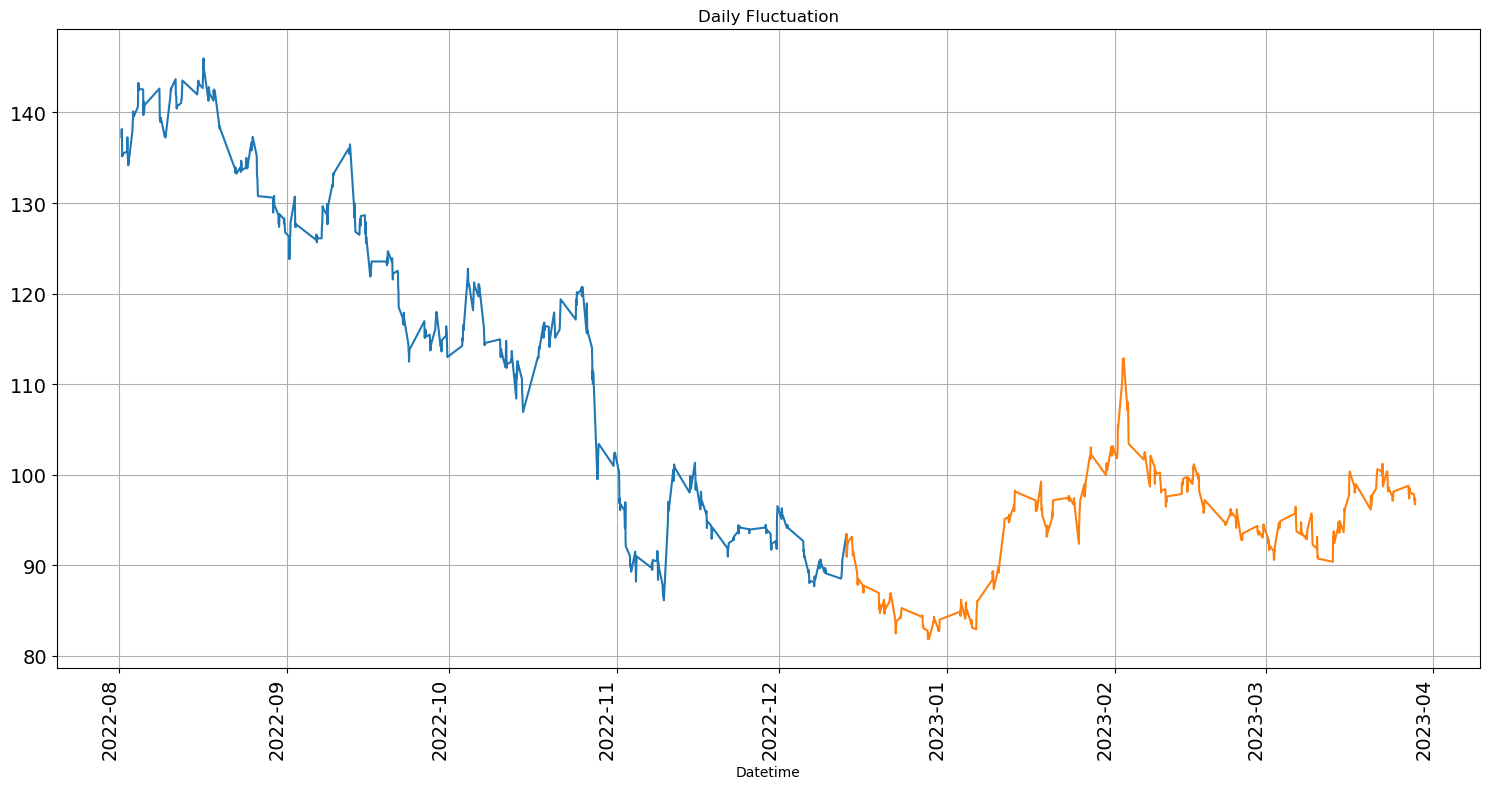

In [5]:
train['Adj Close'].plot(figsize=(15,8), title= 'Daily Fluctuation', fontsize=14)
test['Adj Close'].plot(figsize=(15,8), title= 'Daily Fluctuation', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid()
plt.show()

In [6]:
#create a dict containing all methods' rms
dict_rms = {};

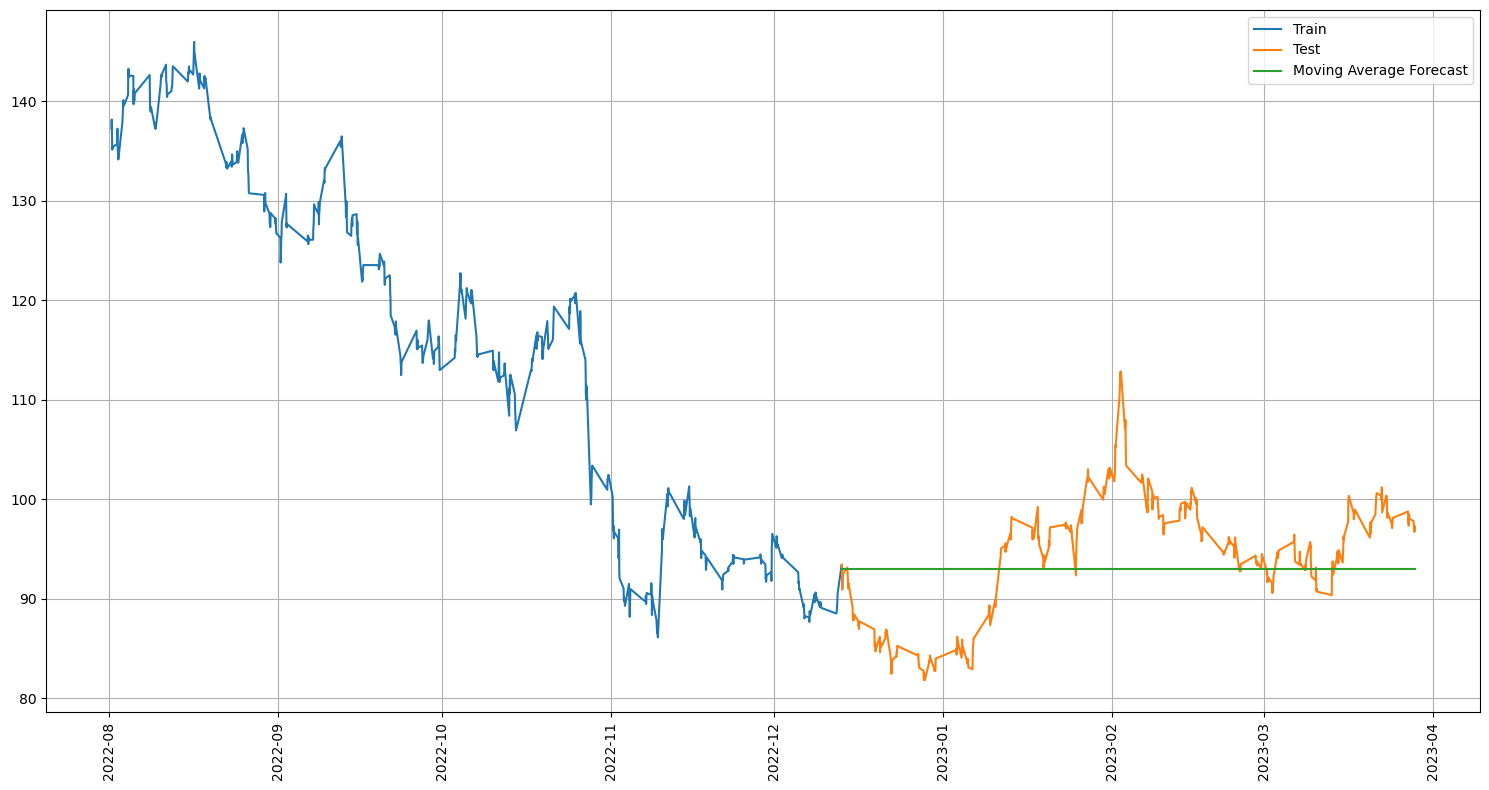

In [7]:
#Moving Average
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Adj Close'].rolling(200).mean().iloc[-1]

rms = sqrt(mean_squared_error(test['Adj Close'], y_hat_avg['moving_avg_forecast']))
dict_rms['Moving Average'] = rms

plt.figure(figsize=(15,8))
plt.plot(train['Adj Close'], label='Train')
plt.plot(test['Adj Close'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid()
plt.legend(loc='best')
plt.show()

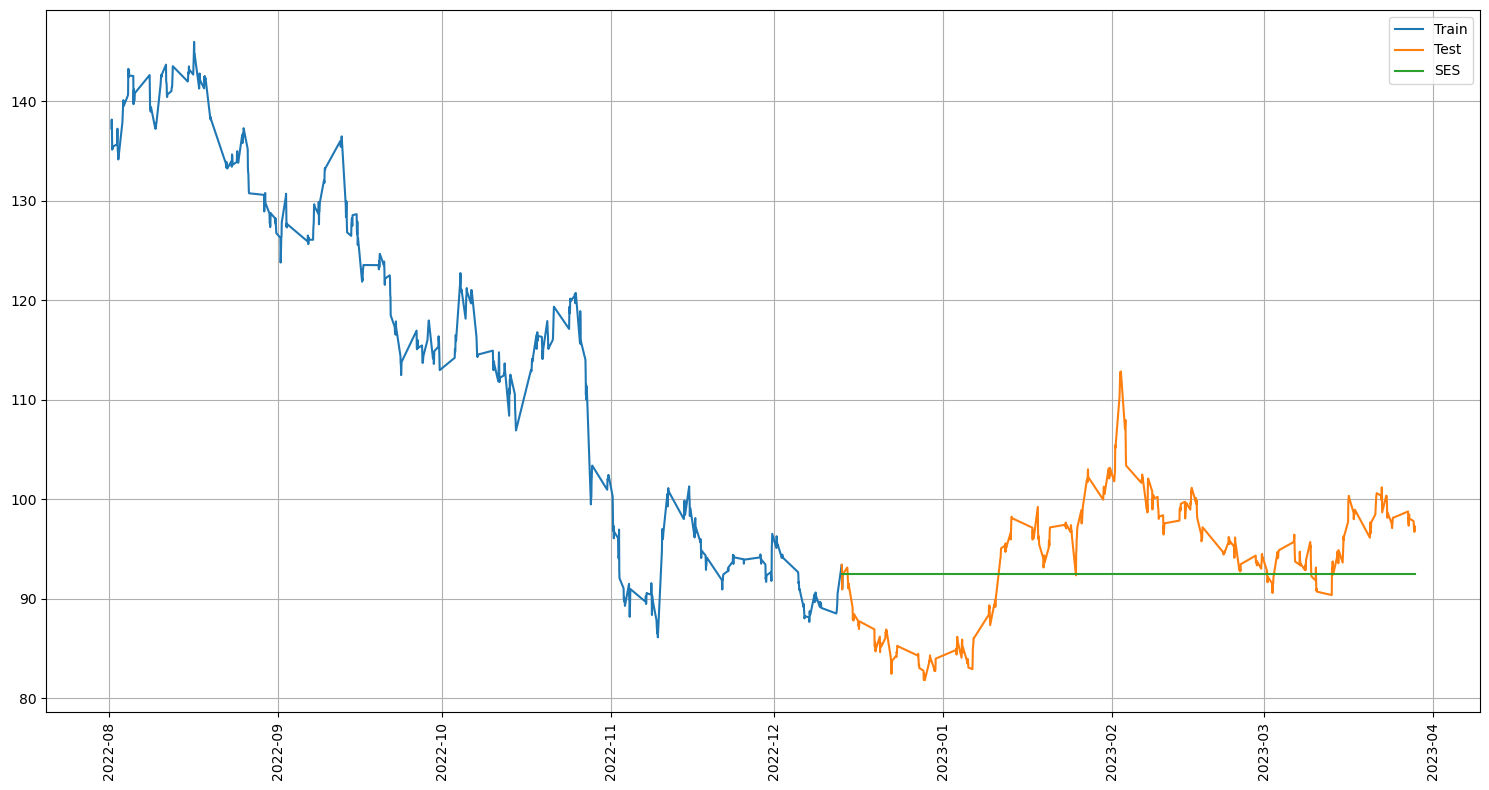

In [8]:
#Simple Exponential Smoothing

y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Adj Close'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))

rms = sqrt(mean_squared_error(test['Adj Close'], y_hat_avg['SES']))
dict_rms['Simple Exponential Smoothing'] = rms

plt.figure(figsize=(15,8))
plt.plot(train['Adj Close'], label='Train')
plt.plot(test['Adj Close'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid()
plt.legend(loc='best')
plt.show()

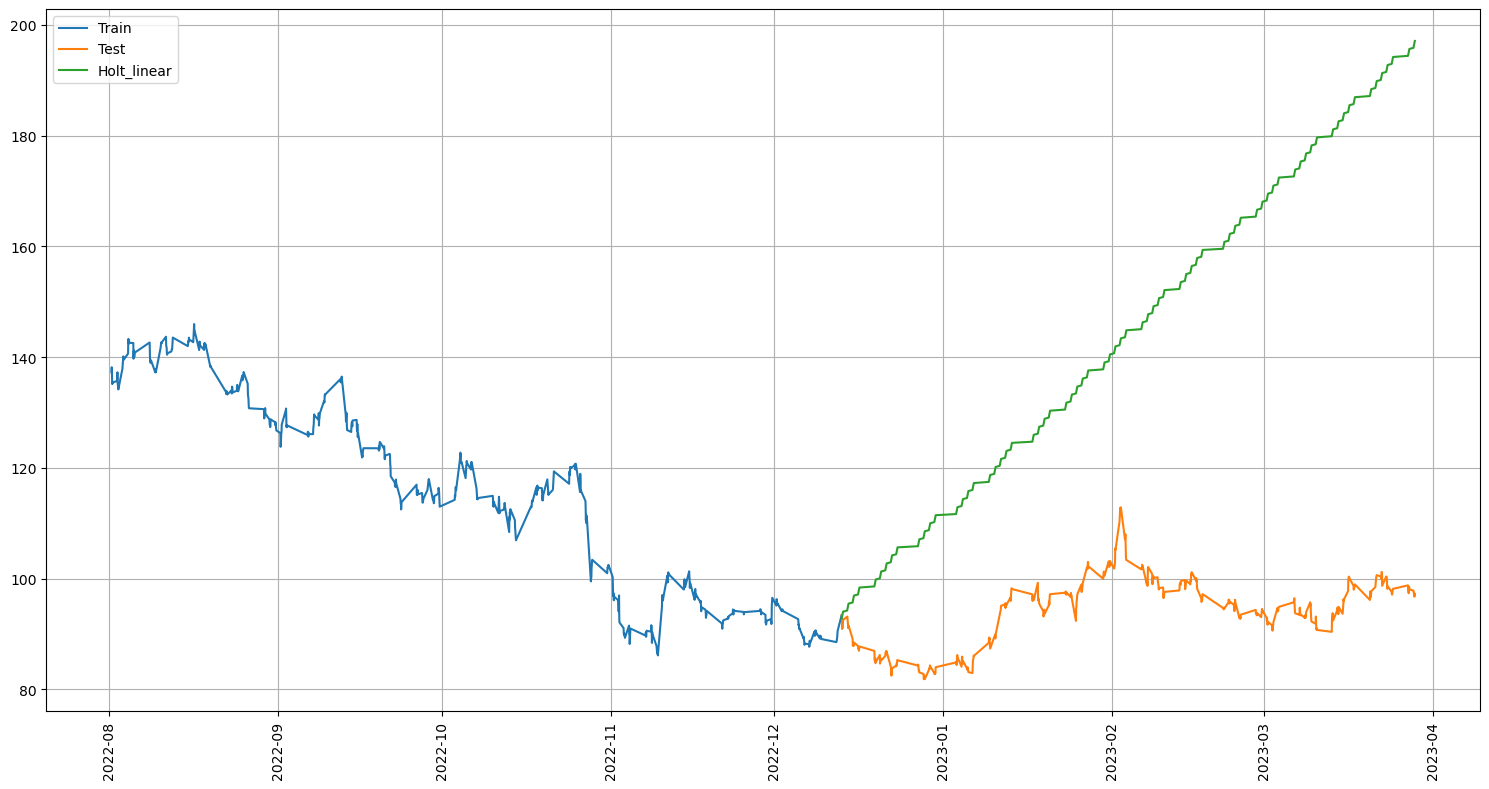

In [9]:
#Holt’s Linear Trend method
y_hat_avg = test.copy()
fit1 = Holt(np.asarray(train['Adj Close'])).fit(smoothing_level = 0.3,smoothing_trend = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

rms = sqrt(mean_squared_error(test['Adj Close'], y_hat_avg['Holt_linear']))
dict_rms['Holt_linear'] = rms

plt.figure(figsize=(15,8))
plt.plot(train['Adj Close'], label='Train')
plt.plot(test['Adj Close'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid()
plt.legend(loc='best')
plt.show()

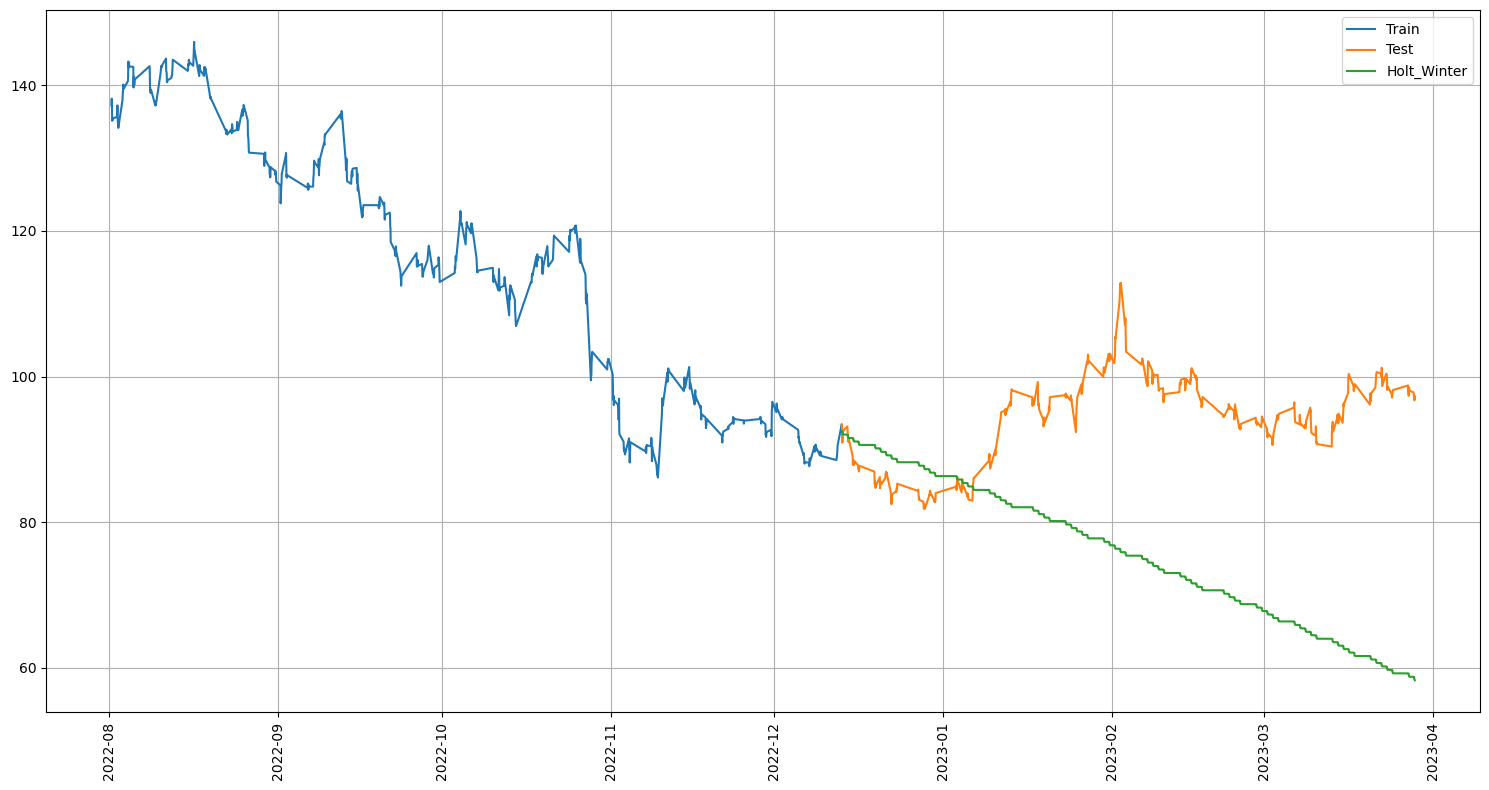

In [10]:
#Holt-Winters Method
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Adj Close']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

rms = sqrt(mean_squared_error(test['Adj Close'], y_hat_avg['Holt_Winter']))
dict_rms['Holt_Winter'] = rms

plt.figure(figsize=(15,8))
plt.plot(train['Adj Close'], label='Train')
plt.plot(test['Adj Close'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid()
plt.legend(loc='best')
plt.show()

C:\Users\zijun\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zijun\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


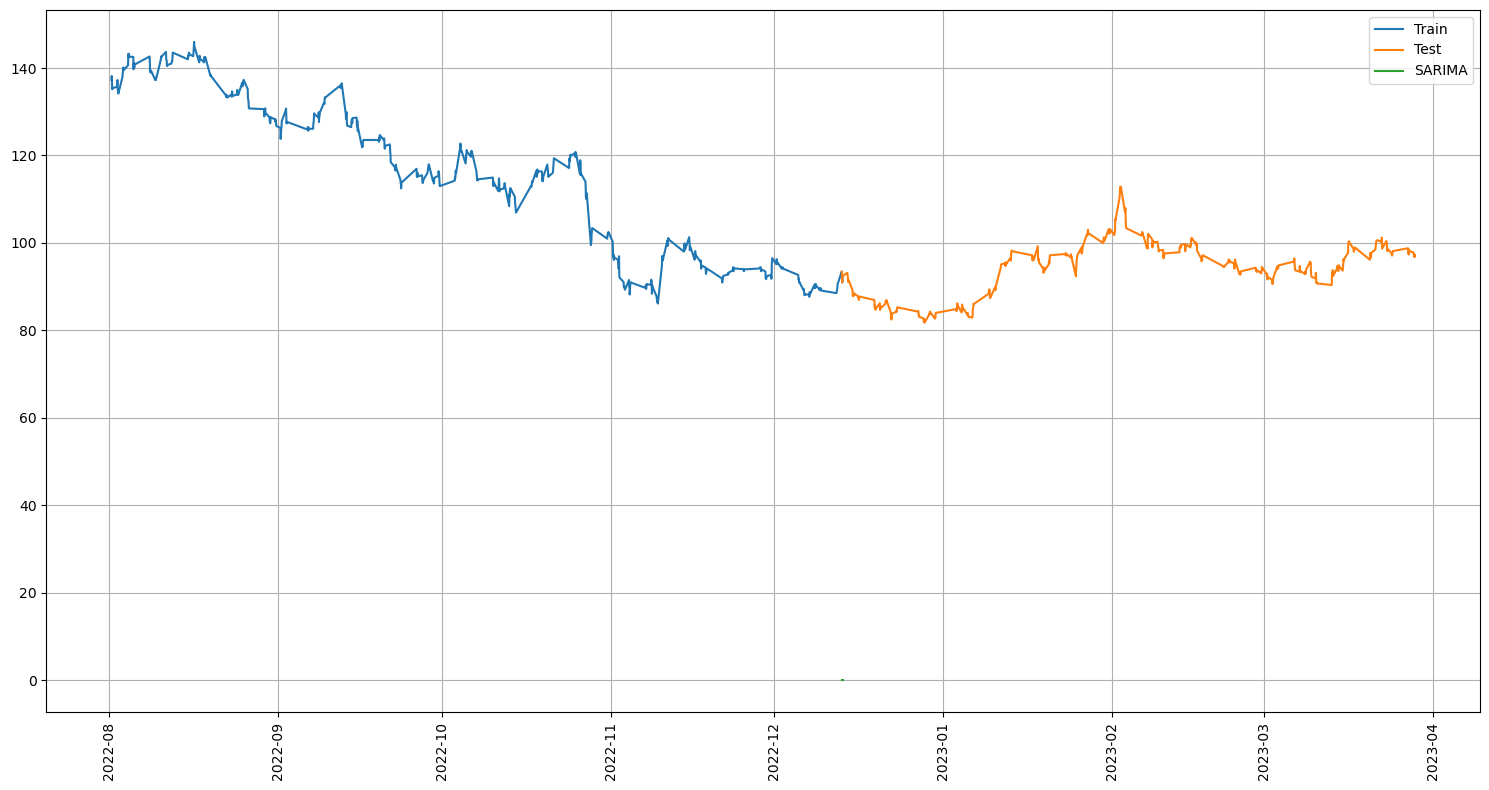

In [11]:
#Autoregressive Integrated Moving average
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train['Adj Close'], order=(3, 1, 1),seasonal_order=(0,0,0,0)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2022-08-01 09:30:00-04:00", end="2022-12-13 15:30:00-05:00", dynamic=True)

#rms = sqrt(mean_squared_error(test['Adj Close'], y_hat_avg['SARIMA']))
#dict_rms['SARIMA'] = rms

plt.figure(figsize=(15,8))
plt.plot(train['Adj Close'], label='Train')
plt.plot(test['Adj Close'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid()
plt.legend(loc='best')
plt.show()


In [12]:
dict_rms

{'Moving Average': 6.283032900800965,
 'Simple Exponential Smoothing': 6.411739478176564,
 'Holt_linear': 57.522252828594056,
 'Holt_Winter': 23.619354560513578}

In [15]:



#part 2: some more complicated models which have been tested(may work in some situations)




In [6]:
#Acquiring Data
target = 'aapl';
start_date = '2022-03-30'
end_date = '2023-03-30'
interval = "1d";

In [7]:
df= yf.download(tickers=target, start = start_date, end = end_date, interval=interval, auto_adjust=False, prepost=False)

[*********************100%***********************]  1 of 1 completed


In [8]:
#FEATURE EXTRACTION
df_feature = pd.DataFrame({});

In [9]:
#Open Price
df_feature.loc[:, 'Open'] = df['Open'];

#Share Volume
df_feature.loc[: , 'Volume'] = df['Volume'];

#Index Ratio = (Today's volume)/(Previous day volume) * Previous day index ratio
df_feature.loc[:, 'Index Ratio'] = np.nan;
index_ir = df_feature.columns.get_loc('Index Ratio');
df_feature.iloc[0, index_ir] = 1000; #set the first ratio to be 1000
for i in range(1, len(df_feature)):
    ir = df['Volume'][i]/df['Volume'][i-1]*df_feature['Index Ratio'][i-1];
    df_feature.iloc[i, index_ir] = ir;

#P/E Ratio (extract data by yahoo_query)
#daily pe waste too much of time, so we use quarter data instead and use random mutipliers within the range to fulfill daily pe
df_feature.loc[:, 'PE'] = np.nan;
index_pe = df_feature.columns.get_loc('PE');
ticker = Ticker(target);
quarter = ticker.valuation_measures.loc[:, ['asOfDate','PeRatio']].reset_index(drop=True)
quarter = quarter.set_index('asOfDate')
list_quarter = quarter.loc['2022-03-31':'2023-03-23','PeRatio'].tolist(); #need to be adjusted if period changes
interval_average = int((len(df_feature)-1)/(len(list_quarter)-1)) #throw decimal
list_random = [];
for i in range(len(list_quarter)):
    list_random.append(list_quarter[i]);
    if i < len(list_quarter)-1:
        start = 1;
        end = round(list_quarter[i+1]/list_quarter[i],4);
        if list_quarter[i] > list_quarter[i+1]:
            list_interval = random.sample(range(int(end*10000), start*10000), interval_average-1);
            list_interval = [x/10000*list_quarter[i] for x in list_interval];
            list_interval = sorted(list_interval, reverse=True);
        else:
            list_interval = random.sample(range(start*10000, int(end*10000)), interval_average-1);
            list_interval = [x/10000*list_quarter[i] for x in list_interval];
            list_interval = sorted(list_interval, reverse=False);
        list_random.extend(list_interval);
    else: #the last interval, length is different from the former intervals'
        start = 0.995;
        end = 1.005;
        list_interval = random.sample(range(int(start*10000), int(end*10000)), len(df_feature)-(interval_average*(len(list_quarter)-1))-1);
        list_interval = [x/10000*list_quarter[i] for x in list_interval];
        list_interval = sorted(list_interval, reverse=True);
        list_random.extend(list_interval);
df_feature.loc[:, 'PE'] = list_random

#Simple Moving Average (SMA) 
SMA = df['Open'].expanding().mean();
df_feature.loc[:, 'SMA'] = SMA;

#On Balance Volume
df_feature.loc[:, 'OBV'] = np.nan;
index_obv = df_feature.columns.get_loc('OBV');
df_feature.iloc[0, index_obv] = df['Volume'][0]; #set the first OBV to be that day's volume
#take OBV into the iterations   
for i in range(1, len(df_feature)):
    if df['Close'][i] > df['Close'][i-1]:
        OBV = df_feature['OBV'][i-1] + df['Volume'][i];
    else:
        OBV = df_feature['OBV'][i-1] - df['Volume'][i];
    df_feature.iloc[i, index_obv] = OBV;

#Price Rate of Change(PROC) = (Today's close - close x period ago)/close x period ago * 100
#set the period to be x days
x = 5;
df_feature.loc[:, 'PROC - 5 days ago'] = np.nan;
index_proc = df_feature.columns.get_loc('PROC - 5 days ago');
for i in range(x,len(df_feature)):
    PROC = (df['Close'][i] - df['Close'][i-x])/(df['Close'][i-x])*100;
    df_feature.iloc[i,index_proc] = PROC;


In [10]:
df_feature = df_feature.dropna(axis=0); #drop NaN rows

In [11]:
df_feature

,Open,Volume,Index Ratio,PE,SMA,OBV,PROC - 5 days ago
Date,,,,,,,
2022-04-06,172.360001,89058800,961.413403,28.076593,175.808334,-175159600.0,-3.341397
2022-04-07,171.160004,77594700,837.655398,28.012888,175.144287,-97564900.0,-1.414582
2022-04-08,171.779999,76575500,826.652863,27.943391,174.723751,-174140400.0,-2.420975
2022-04-11,168.710007,72246700,779.922317,27.827564,174.055557,-246387100.0,-7.111635
2022-04-12,168.020004,79265200,855.688889,27.682779,173.452002,-167121900.0,-4.227119
...,...,...,...,...,...,...,...
2023-03-23,158.830002,67622100,729.998532,26.717521,149.568381,107159100.0,1.976251
2023-03-24,158.860001,59196500,639.041942,26.828099,149.605847,166355600.0,3.387097
2023-03-27,159.940002,52390300,565.567205,26.983022,149.647350,113965300.0,0.559088


In [91]:
#Normalization 
#adjust values measured on various different scales to common scale in each column

In [92]:
#formula: (x-minA)/(maxA-minA)
column = df_feature.columns.tolist();
df_adjust_feature = pd.DataFrame({});
for i in column:
    index_column = df_feature.columns.get_loc(i);
    NEW = (df_feature[i] - min(df_feature[i]))/(max(df_feature[i])-min(df_feature[i]));
    df_adjust_feature.loc[:, 'Adj '+i] = NEW;

In [93]:
df_adjust_feature

,Adj Open,Adj Volume,Adj Index Ratio,Adj PE,Adj SMA,Adj OBV,Adj PROC - 5 days ago
Date,,,,,,,
2022-04-06,0.970884,0.365405,0.365405,1.000000,1.000000,0.710123,0.381193
2022-04-07,0.945748,0.287633,0.287633,0.980371,0.975005,0.766271,0.468463
2022-04-08,0.958735,0.280718,0.280718,0.976765,0.959176,0.710861,0.422881
2022-04-11,0.894428,0.251352,0.251352,0.963145,0.934024,0.658583,0.210429
2022-04-12,0.879975,0.298965,0.298965,0.947922,0.911306,0.715939,0.341076
...,...,...,...,...,...,...,...
2023-03-23,0.687474,0.219979,0.219979,0.783715,0.012313,0.914411,0.622043
2023-03-24,0.688102,0.162820,0.162820,0.785480,0.013723,0.957245,0.685943
2023-03-27,0.710725,0.116646,0.116646,0.791027,0.015285,0.919336,0.557856


In [94]:
df_adjust_feature = round(df_adjust_feature,3); #round the decimal
df_adjust_feature = df_adjust_feature.multiply(1000); #make all cell values to be int for .fit()
del df_adjust_feature['Adj Index Ratio']
df_adjust_feature

,Adj Open,Adj Volume,Adj PE,Adj SMA,Adj OBV,Adj PROC - 5 days ago
Date,,,,,,
2022-04-06,971.0,365.0,1000.0,1000.0,710.0,381.0
2022-04-07,946.0,288.0,980.0,975.0,766.0,468.0
2022-04-08,959.0,281.0,977.0,959.0,711.0,423.0
2022-04-11,894.0,251.0,963.0,934.0,659.0,210.0
2022-04-12,880.0,299.0,948.0,911.0,716.0,341.0
...,...,...,...,...,...,...
2023-03-23,687.0,220.0,784.0,12.0,914.0,622.0
2023-03-24,688.0,163.0,785.0,14.0,957.0,686.0
2023-03-27,711.0,117.0,791.0,15.0,919.0,558.0


In [95]:
x_train = [df_adjust_feature[i].tolist() for i in df_adjust_feature.columns.values.tolist()];
x_train = list(map(list, np.transpose(x_train)));

In [96]:
#train value y: Close value
df_close = df.loc['2022-04-06':'2023-03-29','Close'];
df_adjust_close = (df_close- min(df_close))/(max(df_close)-min(df_close));
df_adjust_close = round(df_adjust_close,3);
df_adjust_close = df_adjust_close.multiply(1000);

In [97]:
y_train = df_adjust_close.tolist();

In [98]:
df_adjust_feature.loc['2023-03-23':'2023-03-29', ['Adj Open','Adj PE']]

,Adj Open,Adj PE
Date,,
2023-03-23,687.0,784.0
2023-03-24,688.0,785.0
2023-03-27,711.0,791.0
2023-03-28,669.0,800.0
2023-03-29,699.0,779.0


In [99]:
clf = MLPClassifier(hidden_layer_sizes=(7,246), solver='lbfgs', activation='tanh', alpha=1e-5,  random_state=1, learning_rate_init=0.07, tol=0.05)

clf.fit(x_train, y_train)

MLPClassifier(activation='tanh', alpha=1e-05, hidden_layer_sizes=(7, 246),
              learning_rate_init=0.07, random_state=1, solver='lbfgs',
              tol=0.05)

In [100]:
clf.score(x_train, y_train)

0.008130081300813009

In [80]:
clf.predict(df_adjust_feature.loc['2023-01-23':'2023-02-28',:])

C:\Users\zijun\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


array([356., 356., 356., 356., 356., 356., 356., 356., 356., 356., 356.,
       356., 356., 356., 356., 356., 356., 356., 356., 356., 356., 356.,
       356., 356., 356., 356.])

In [223]:
#De normalization
#D= output * ( maxA - minA ) + minA
df_close = pd.DataFrame({});

output = output*(max(df_close)-min(df_close)) + min(df_close)

,Close
Date,
2022-04-05,175.059998
2022-04-06,171.830002
2022-04-07,172.139999
2022-04-08,170.089996
2022-04-11,165.750000
...,...
2023-03-23,158.929993
2023-03-24,160.250000
2023-03-27,158.279999


In [86]:
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = df[['Open']]
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train, test = train_test_split(dataset, test_size=0.33, shuffle=False)
# reshape into X=t and Y=t+1
look_back = 1
trainX = train[:-1*look_back] #delete rows on the bottom
trainY = np.roll(train, -1*look_back, axis=None)[:-1*look_back]
testX = test[:-1*look_back]
testY = np.roll(test, -1*look_back, axis=None)[:-1*look_back]

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [93]:
trainY.shape

(167, 1)

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [35]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df)

In [36]:
dataset


array([[1.        , 1.        , 1.        , 0.98745792, 0.98732388,
        0.38965348],
       [0.98648636, 0.96952157, 0.95621544, 0.92830398, 0.92753667,
        0.46031609],
       [0.91397023, 0.90875781, 0.90938522, 0.92268805, 0.92186082,
        0.29547895],
       ...,
       [0.64579368, 0.63657417, 0.64153813, 0.62261323, 0.6367156 ,
        0.11664646],
       [0.60829841, 0.59259272, 0.6055587 , 0.6108198 , 0.62472377,
        0.07324188],
       [0.63494466, 0.64197538, 0.66971271, 0.66922508, 0.68411162,
        0.10928856]])

In [75]:

np.array(df['Open']).reshape(-1, 1)


array([[178.55000305],
       [177.83999634],
       [174.02999878],
       [174.57000732],
       [177.5       ],
       [172.36000061],
       [171.16000366],
       [171.77999878],
       [168.71000671],
       [168.02000427],
       [167.38999939],
       [170.61999512],
       [163.91999817],
       [165.02000427],
       [168.75999451],
       [168.91000366],
       [166.46000671],
       [161.11999512],
       [162.25      ],
       [155.91000366],
       [159.25      ],
       [161.83999634],
       [156.71000671],
       [158.1499939 ],
       [159.66999817],
       [163.8500061 ],
       [156.00999451],
       [154.92999268],
       [155.52000427],
       [153.5       ],
       [142.77000427],
       [144.58999634],
       [145.55000305],
       [148.86000061],
       [146.8500061 ],
       [139.88000488],
       [139.08999634],
       [137.78999329],
       [140.80999756],
       [138.42999268],
       [137.38999939],
       [145.38999939],
       [149.07000732],
       [149

In [23]:
training_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-06,156.470001,157.089996,153.690002,154.529999,154.038879,73714800
2022-06-06,147.029999,148.570007,144.899994,146.139999,145.473495,71598400
2022-09-21,157.339996,158.740005,153.600006,153.720001,153.231461,101696800
2023-03-27,159.940002,160.770004,157.869995,158.279999,158.279999,52390300
2023-01-26,143.169998,144.250000,141.899994,143.960007,143.740540,54105100
...,...,...,...,...,...,...
2022-07-07,143.289993,146.550003,143.279999,146.350006,145.682541,66253700
2023-03-23,158.830002,161.550003,157.679993,158.929993,158.929993,67622100
2022-05-05,163.850006,164.080002,154.949997,156.770004,155.826065,130525300


In [24]:
len(testing_data)

51

In [ ]:
#Artificial Neural Network (Multilayer Perceptron Model)
weight_random = np.random.dirichlet(np.ones(len(df_adjust_feature.columns.values.tolist())),size=1).tolist();
weight_random = [item for sublist in weight_random for item in sublist];
weight_random

In [47]:
df.loc[:, ['Open','Volume']].shape[1]

2

In [55]:
df.loc[:, ['Open','Volume']].shift(periods=-1, freq=None, axis=0)[:-1]

,Open,Volume
Date,,
2022-03-30,177.839996,103049300.0
2022-03-31,174.029999,78751300.0
2022-04-01,174.570007,76468400.0
2022-04-04,177.500000,73401800.0
2022-04-05,172.360001,89058800.0
...,...,...
2023-03-22,158.830002,67622100.0
2023-03-23,158.860001,59196500.0
2023-03-24,159.940002,52390300.0


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(2,), random_state=1,
              solver='lbfgs')

In [ ]:
#we will introduce a mixed approach
#combing traditional time series method and deep learning method to predict stock prices
#The innovation of the article emphasizes the long-term dependence of LSTMon performance to
#improve accuracy, and the mixed approach can improve the robustness of the model.

array([1, 0])

In [207]:
aapl.valuation_measures

,asOfDate,periodType,EnterpriseValue,EnterprisesValueEBITDARatio,EnterprisesValueRevenueRatio,ForwardPeRatio,MarketCap,PbRatio,PeRatio,PegRatio,PsRatio
symbol,,,,,,,,,,,
aapl,2021-12-31,3M,2.963725e+12,66.403587,23.911613,31.6456,2.901645e+12,45.992153,31.652406,3.7908,8.186344
aapl,2022-03-31,3M,2.888888e+12,86.063349,29.697243,29.0698,2.830003e+12,39.342761,28.956882,3.3744,7.715197
aapl,2022-06-30,3M,2.269030e+12,85.333963,27.351223,21.5517,2.200560e+12,32.649744,22.230894,2.3765,5.874047
aapl,2022-09-30,3M,2.274841e+12,80.244147,25.235078,21.8341,2.203381e+12,37.919379,22.842975,2.4734,5.867952
aapl,2022-12-31,3M,2.138707e+12,54.086965,18.255516,21.2766,2.066942e+12,40.622118,21.265139,2.5328,5.379313
aapl,2023-03-23,TTM,NaN,NaN,NaN,26.8817,NaN,44.327778,26.983022,2.6876,6.637483
aapl,2023-03-24,TTM,2.595222e+12,NaN,NaN,NaN,2.535467e+12,NaN,NaN,NaN,NaN
aapl,2023-03-26,TTM,NaN,20.267570,6.696707,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
isin = "LGEN.L"
yf.download(tickers=isin, period="5y", interval="1d", auto_adjust=False, prepost=False)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-03-29,257.600006,262.200012,257.600006,257.799988,183.591110,18899650
2018-04-03,255.600006,259.799988,254.100006,257.500000,183.377457,17799519
2018-04-04,257.500000,257.799988,253.399994,256.500000,182.665314,17467617
2018-04-05,260.799988,261.799988,259.100006,260.899994,185.798782,16504693
2018-04-06,259.899994,262.200012,259.899994,261.700012,186.368484,15938420
...,...,...,...,...,...,...
2023-03-23,235.000000,235.399994,228.899994,228.899994,228.899994,22669003
2023-03-24,228.000000,229.600006,221.800003,229.399994,229.399994,34888966
2023-03-27,233.199997,234.600006,228.100006,229.399994,229.399994,22731129
